In [42]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [21]:
# Read in zones and bird-beak data.
zones = pd.read_csv('zones_group_bbh.csv')
zones = zones[['zone', 'group', 'bbh']]
zones['aortic zone'] = 'zone-'+zones['zone'].astype(str)
zones['pat_num'] = np.r_[1:21]
pat_map = {
           1: 'T1',
           2: 'T2',
           3: 'T3',
           4: 'T5',
           5: 'T6',
           6: 'T7',
           7: 'T9',
           8: 'T10',
           9: 'T11',
          10: 'T12',
          11: 'T13',
          12: 'T14',
          13: 'T16',
          14: 'T17',
          15: 'T18',
          16: 'T19',
          17: 'T20',
          18: 'T21',
          19: 'T22',
          20: 'T23'
                    }
zones['group_numeric'] = zones['group'].apply(lambda x: 1 if x=='BBG' else 0)
zones.set_index('pat_num',inplace=True)
zones


,zone,group,bbh,aortic zone,group_numeric
pat_num,,,,,
1,2,BBG,8.6,zone-2,1
2,2,NBBG,3.3,zone-2,0
3,2,NBBG,1.6,zone-2,0
4,3,BBG,6.6,zone-3,1
5,3,BBG,5.7,zone-3,1
6,3,NBBG,1.4,zone-3,0
7,4,BBG,9.3,zone-4,1
8,3,NBBG,0.8,zone-3,0
9,2,BBG,8.9,zone-2,1


Stat: 117.0 P-Value: 0.012


count
group aortic zone       
BBG   zone-2        50.0
      zone-3        30.0
      zone-4        20.0
NBBG  zone-2        40.0
      zone-3        50.0
      zone-4        10.0

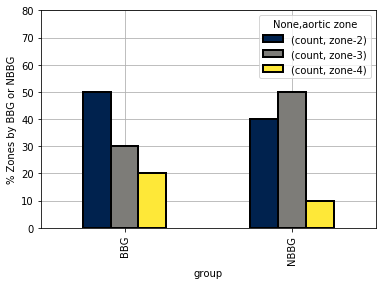

In [93]:
# Test
statistic, p = stats.mannwhitneyu(x=zones['zone'], y=zones['bbh'])
print("Stat: {} P-Value: {:.3f}".format(statistic, p))

# Group
zone_agg = zones.groupby('group').agg({'aortic zone': 'value_counts'}).sort_index().rename(columns={'aortic zone': 'count'})
zone_agg = zone_agg.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
display(zone_agg)

# Plot
ax = zone_agg.unstack().plot(kind='bar', grid=True, colormap='cividis', edgecolor='k', linewidth=2)
ax.set_ylabel('% Zones by BBG or NBBG')
ax.set_ylim(0, 80)
ax.set_axisbelow(True)


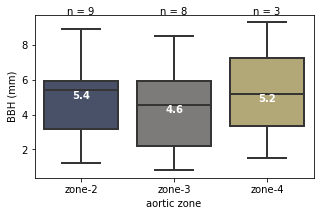

In [171]:


bb_background = plt.Rectangle(anchor_point, length, height, color='k', alpha=0.1)

plt.show()
class ZonePlot:
    def __init__(self, data):
        
        self.data = data
    def _make_fig(self):
        sns.set_palette("cividis", 3)
        self.fig, self.ax = plt.subplots(1,1,figsize=(5, 3))
    def box_plot(self, **kwargs):
        sns.boxplot(**kwargs)
    def swarm_plot(self, **kwargs):
        sns.swarmplot(**kwargs)

    def label_axes(self):
        self.ax.set_ylabel('BBH (mm)')
    def patch(self):
        anchor_point = (-.5,5)
        length = 3
        height = 5
        alpha=0.1
        patch_shape = plt.Rectangle(anchor_point, length, height, alpha=alpha, color='r')
        self.ax.add_patch(patch_shape)
    def _agg_data(self):
        self.data_agg = self.data.groupby('aortic zone').agg({'bbh': ['count', 'median']})
    def annote_n(self):
        length_data = len(self.data_agg)
        row_ind = .5
        for _, row in self.data_agg.iterrows():
            n = row[('bbh','count')]
            plt.text(row_ind/length_data, 1,
                     s='n = {:.0f}'.format(n),
                     transform=self.ax.transAxes,
                     horizontalalignment='center')
            row_ind+=1
    def annote_median(self):
        length_data = len(self.data_agg)
        row_ind = 0
        for _, row in self.data_agg.iterrows():
            med = row[('bbh','median')]
            plt.annotate(xy=(row_ind, med),
                     s='{:.1f}'.format(med),
                     transform=self.ax.transAxes,
                     horizontalalignment='center',
                     verticalalignment='top',
                     color='w',
                      fontweight='bold')
            row_ind+=1
    def main_plot(self):
        self._agg_data()
        self._make_fig()
        self.box_plot(x='aortic zone',y='bbh',data=self.data, ax=self.ax, linewidth=2)
        self.annote_n()
        self.annote_median()
        self.label_axes()
        #self.swarm_plot(x='aortic zone',y='bbh',data=self.data, color='r', marker='o', ax=self.ax)
        #self.patch()

ZonePlot(zones).main_plot()

        

bbh       
            count median
aortic zone             
zone-2          9   5.40
zone-3          8   4.55
zone-4          3   5.20